# Exploring text with geometry

In this lesson, we will learn how to:

- create a document-term matrix

- compare texts using geometry tools

- visualize distance between texts

- cluster texts based on the distance between them

Let's get started by importing the corpus of constitutions we worked with last week.

In [299]:
import os
import nltk


from nltk.corpus import CategorizedPlaintextCorpusReader
corpus_root = "/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/Constitutions/"
constitutions = CategorizedPlaintextCorpusReader(corpus_root, 
                                             fileids=r'Constitution-(\w+)-\d{4}\.txt',  #regular expressions
                                             cat_pattern=r'Constitution-(\w+)-\d{4}\.txt',
                                             encoding='latin-1')



constitutions.abspaths()

filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/Constitutions/'

filename = [file for file in os.listdir(corpus_root)]

filename

['Constitution-Kenya-1983.txt',
 'Constitution-Ghana-1957.txt',
 'Constitution-Sudan-1958.txt',
 'Constitution-Chad-1962.txt',
 'Constitution-Madagascar-1962.txt',
 'Constitution-Cameroon-1961.txt',
 'Constitution-Mali-1960.txt',
 'Constitution-Ghana-1969.txt',
 'Constitution-Rwanda-1962.txt',
 'Constitution-Liberia-1955.txt',
 '.DS_Store',
 'Constitution-Ghana-1992.txt',
 'Constitution-Ghana-1979.txt',
 'Constitution-Guinea-1958.txt',
 'Constitution-DRC-1964.txt',
 'Constitution-Kenya-1987.txt',
 'Constitution-Mauritania-1961.txt',
 'Constitution-SierraLeone-1991.txt',
 'Constitution-SierraLeone-1978.txt',
 'Constitution-Uganda-1995.txt',
 'Constitution-Zambia-1991.txt',
 'Constitution-Malawi-1978.txt',
 'Constitution-Ethiopia-1955.txt',
 'Constitution-Nigeria-1961.txt',
 'Constitution-Niger-1960.txt',
 'Constitution-Malawi-1974.txt',
 'Constitution-Tanzania-1962.txt',
 'Constitution-Uganda-1971.txt',
 'Constitution-Zambia-1974.txt',
 'Constitution-SierraLeone-1966.txt',
 'Constitutio

## Creating a document-term matrix

In order to perform machine learning on text documents, we first need to turn our text content into numerical feature vectors. Word (or n-gram) frequencies are typical units of analysis when working with text collections. It may come as a surprise that reducing a text to a list of word frequencies retains useful information, but practice has shown this to be the case. Treating texts as a list of word frequencies (a vector) also makes available a vast range of mathematical tools developed for studying and manipulating vectors.

In what follows, we will be working with the [CountVectorizer](http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class from the scikit-learn package. CountVectorizer gather word frequencies (or term frequencies) associated with texts into a document-term matrix.

### Texts as vectors and matrices

What does this vector look like? The most intuitive approach uses the bag of words assumption, i.e. counts each word individually.

- Create a dictionary of word features that assigns an integer ID to each word ( *W* ) occurring in any document, _d_

- For each document ( _i_ ), count the number of occurrences of each word ( *W* ) 

- Create a vector X_d[ *i, j* ], where _i_ counts the number of times each word from the dictionary appears in a given document, d, and *j* is the index of that word in the dictionary of word features

Our document-term matrix will consist of all of the vectors X_d, i.e. a vector *X* for each document _d_ in our corpus.

In [241]:
import numpy as np  # a conventional alias for numpy, this package allows us to perform array operations on our matrix

from sklearn.feature_extraction.text import CountVectorizer

### CountVectorizer Class

The CountVectorizer class will create a document-term matrix using our corpus of constitutions. CountVectorizer is customizable according to the following specifications.

- <span style="color:blue"> **encoding** </span> : ‘utf-8’ by default
- <span style="color:blue"> **lowercase** </span> : (default <span style="color:green"> **True** </span> ) convert all text to lowercase before tokenizing
- <span style="color:blue"> **stop_words** </span> : custom list of “stop words”, if ‘english’, a built-in stop word list for English is used
- <span style="color:blue"> **mind_df** </span> : (default <span style="color:green"> __1__ </span> ) remove terms from the vocabulary that occur in fewer than <span style="color:green"> **min_df** </span> documents (in a large corpus this may be set to <span style="color:green"> **15** </span> or higher to eliminate very rare words)
- <span style="color:blue"> **vocabulary** </span> :  ignore words that do not appear in the provided list of words
- <span style="color:blue"> **strip_accents** </span> : remove accents
- <span style="color:blue"> **token_pattern** </span> : (default <span style="color:green"> **u'(?u)\b\w\w+\b'** </span> ) regular expression identifying tokens. By default, words that consist of a single character (e.g., ‘a’, ‘2’) are ignored, setting token_pattern to '(?u)\b\w+\b' will include these tokens
- <span style="color:blue"> **tokenizer** </span> : (default unused) use a custom function for tokenizing
- <span style="color:blue"> **decode_error** </span> : (default <span style="color:green"> **strict** </span>) : Instruction on what to do if a byte sequence is given to analyze that contains characters not of the given encoding; by default, it is ‘strict’, meaning that a UnicodeDecodeError will be raised, but other values are ‘ignore’ and ‘replace’

In [264]:
vectorizer = CountVectorizer(input='filename', 
                             encoding= 'ISO-8859-1',
                             stop_words='english',
                             min_df = 10,
                             decode_error='ignore')

dtm = vectorizer.fit_transform(raw_documents=constitutions.abspaths())  # .abspaths() provides the absolute filepath to every document in our corpus

vocab = vectorizer.get_feature_names()  # a list

We now have a document-term matrix (dtm) and a vocabulary list (vocab)! 

Let's take a look at what we have created.

In [266]:
dtm
print(dtm)

  (0, 1187)	1
  (0, 2162)	1
  (0, 1962)	1
  (0, 1006)	1
  (0, 27)	1
  (0, 2129)	1
  (0, 582)	1
  (0, 2116)	1
  (0, 2017)	1
  (0, 1134)	1
  (0, 782)	1
  (0, 365)	1
  (0, 1521)	1
  (0, 1680)	1
  (0, 1388)	1
  (0, 1673)	1
  (0, 1045)	1
  (0, 194)	1
  (0, 1004)	1
  (0, 26)	1
  (0, 2331)	1
  (0, 196)	1
  (0, 25)	1
  (0, 1641)	1
  (0, 2095)	1
  :	:
  (55, 397)	233
  (55, 1583)	186
  (55, 2451)	3
  (55, 796)	26
  (55, 2454)	2
  (55, 827)	7
  (55, 1326)	4
  (55, 767)	1
  (55, 2244)	3
  (55, 947)	2
  (55, 1728)	1
  (55, 2135)	23
  (55, 1182)	3
  (55, 1232)	19
  (55, 1741)	289
  (55, 1259)	2
  (55, 874)	2
  (55, 736)	6
  (55, 469)	4
  (55, 593)	5
  (55, 1804)	6
  (55, 1391)	4
  (55, 1405)	1
  (55, 1419)	1
  (55, 697)	194


In [249]:
dtm.shape # dimensions of the matrix -- what do you notice about the size of this object?

(56, 2564)

In [250]:
type(vocab), len(vocab) # what do you notice about the length of vocab?

(list, 2564)

In [254]:
vocab

['able',
 'abolish',
 'abolished',
 'abolition',
 'abroad',
 'absence',
 'absent',
 'absolute',
 'ac',
 'accepted',
 'accepts',
 'access',
 'accompanied',
 'accordance',
 'accorded',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accredit',
 'accredited',
 'accused',
 'acquired',
 'acquires',
 'acquisition',
 'acquittal',
 'acquitted',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'acts',
 'ad',
 'adaptations',
 'addicted',
 'addition',
 'additional',
 'address',
 'addressed',
 'adequate',
 'adjourn',
 'adjourned',
 'adjournment',
 'adjudged',
 'adjudicating',
 'administer',
 'administered',
 'administration',
 'administrations',
 'administrative',
 'admitted',
 'adopt',
 'adopted',
 'adoption',
 'advance',
 'advanced',
 'advances',
 'advantage',
 'advantageous',
 'advantages',
 'advice',
 'advise',
 'adviser',
 'advises',
 'advising',
 'advisory',
 'advocate',
 'advocates',
 'affairs',
 'affect',
 'affected',
 'affecting',
 'affi

Try different values for **min_df** and rerun the CountVectorizer function. How does this change the size of dtm and the vocab?

Also note that many strings in our vocab list are numeric. Do you want to keep these numbers in your analysis? If not, how would you adjust the CountVectorizer function to remove them?

In [252]:
vectorizer = CountVectorizer(input='filename', 
                             encoding= 'ISO-8859-1',
                             stop_words='english',
                             min_df = 15,
                             decode_error='ignore', 
                            token_pattern=r'\b[^\d\W]+\b') # regular expression to capture non-digit words

dtm = vectorizer.fit_transform(raw_documents=constitutions.abspaths())  # .abspaths() provides the absolute filepath to every document in our corpus

vocab = vectorizer.get_feature_names()  # a list

In [261]:
dtm.shape

(56, 1887)

### The document term matrix

Countvectorizer returns a certain type of matrix object.

In [267]:
dtm # the dtm is currently a sparse matrix

<56x2564 sparse matrix of type '<class 'numpy.int64'>'
	with 67197 stored elements in Compressed Sparse Row format>

### What is a sparse matrix?

Imagine you have a matrix with hundreds of thousands of elements and only a few of those elements contain non-zero values. Most text data is like this because of the way we are representing the texts as word counts across the entire corpora. While we could look at the entire matrix with all of its zero *and* nonzero entries (a.k.a. **dense matrix**), there are much more efficient methods of dealing with such data.

A **sparse matrix** is a special type of data structure that only records **non-zero entries**, which is much more efficient in terms of memory and computing time. This is why CountVectorizer returns a sparse matrix by default.

When we look at the CountVectorizer dtm object, we can see how a sparse matrix is structured. There are two arrays printed below, where the first array points to the index of a non-zero entry (i.e. the word), and the second array contains the value of that non-zero entry (i.e. the word count). 

In [268]:
print(dtm) # this is what the sparse matrix looks like

  (0, 1187)	1
  (0, 2162)	1
  (0, 1962)	1
  (0, 1006)	1
  (0, 27)	1
  (0, 2129)	1
  (0, 582)	1
  (0, 2116)	1
  (0, 2017)	1
  (0, 1134)	1
  (0, 782)	1
  (0, 365)	1
  (0, 1521)	1
  (0, 1680)	1
  (0, 1388)	1
  (0, 1673)	1
  (0, 1045)	1
  (0, 194)	1
  (0, 1004)	1
  (0, 26)	1
  (0, 2331)	1
  (0, 196)	1
  (0, 25)	1
  (0, 1641)	1
  (0, 2095)	1
  :	:
  (55, 397)	233
  (55, 1583)	186
  (55, 2451)	3
  (55, 796)	26
  (55, 2454)	2
  (55, 827)	7
  (55, 1326)	4
  (55, 767)	1
  (55, 2244)	3
  (55, 947)	2
  (55, 1728)	1
  (55, 2135)	23
  (55, 1182)	3
  (55, 1232)	19
  (55, 1741)	289
  (55, 1259)	2
  (55, 874)	2
  (55, 736)	6
  (55, 469)	4
  (55, 593)	5
  (55, 1804)	6
  (55, 1391)	4
  (55, 1405)	1
  (55, 1419)	1
  (55, 697)	194


### Coverting to numpy array

Before we can query the matrix and discover how many times certain words appear in each constitution, we need to convert this matrix from its current format, a sparse matrix, into a normal NumPy array. We will also convert the Python list storing our vocabulary, vocab, into a NumPy array, because array objects support more operations than a list.

In [255]:
dtm = dtm.toarray()  # convert to a regular array
vocab = np.array(vocab)

In [256]:
type(dtm) # note the new type

numpy.ndarray

In [263]:
print(dtm) # is this a sparse or dense matrix?

dtm.shape

[[  1   0   1 ...   4   0   0]
 [  0   0   0 ...   2   3   0]
 [  0   0   0 ...   6   0   0]
 ...
 [  1   1   2 ...  34   1 147]
 [  1   1   2 ...  35   1 140]
 [  1   2   2 ...  29   0  70]]


(56, 1887)

In [259]:
print(vocab)

['able' 'abolish' 'abolished' ... 'years' 'youth' 'â']


### Exploring the dtm
With this preparatory work behind us, querying the document-term matrix is simple. Below, here are two ways to find out how many times the word ‘president’ appears in the first document (constitution) in our corpus.

In [277]:
filenames[0]

'Constitution-Kenya-1983.txt'

In [275]:
dtm[0, vocab == 'president']

0

In [276]:
dtm[1, vocab == ['president']]

0

## Comparing texts

Arranging our texts as a document-term matrix allows us to do a lot of exploratory analysis using computational techniques.

For example, we can now easily calculate a measure of similarity between texts. Since each row of the document-term matrix is a sequence of word frequencies for a given constitution, we can use the similarity (or distance) between sequences of numbers in order to calculate the similarity (or distance) between any two constitutions.

### Euclidean distance

One frequently used measure of distance between vectors (a measure easily converted into a measure of similarity) is Euclidean distance. The Euclidean distance between two vectors in a plane is the length of the hypotenuse that joins the two vectors. For instance, consider the Euclidean distance between the vectors x⃗ =(1,3)
and y⃗ =(4,2). The distance between the two vectors is $\sqrt{(1−4)^2+(3−2)^2} = \sqrt{10}$.

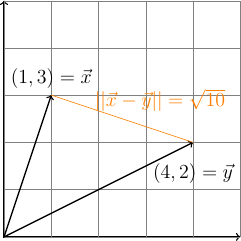


Generally speaking, given two vectors x⃗ and y⃗ in p-dimensional space, the Euclidean distance between the two vectors is given by $||x⃗ −y⃗ || = \sum_i^p\sqrt{(x_i−y_i)^2}$

Because we have now expressed the constitutions in our corpus as vectors, we can calculate the Euclidean distance between any two constitutions. Conveniently, scikit-learn already has a function that is precisely for this task.

In [278]:
from sklearn.metrics.pairwise import euclidean_distances

dist = euclidean_distances(dtm)

In [279]:
dist

np.round(dist, 0) # easier to print output if we round to the nearest integer

array([[   0.,  155.,  154., ..., 1117., 1115.,  917.],
       [ 155.,    0.,  122., ..., 1133., 1130.,  928.],
       [ 154.,  122.,    0., ..., 1094., 1091.,  892.],
       ...,
       [1117., 1133., 1094., ...,    0.,   54.,  320.],
       [1115., 1130., 1091., ...,   54.,    0.,  314.],
       [ 917.,  928.,  892., ...,  320.,  314.,    0.]])

In [280]:
dist.shape # what do the dimensions of this array represent?

(56, 56)

In [281]:
filenames[1], filenames[2], filenames[3], filenames[4] #remind ourselves of which text is which

('Constitution-Ghana-1957.txt',
 'Constitution-Sudan-1958.txt',
 'Constitution-Chad-1962.txt',
 'Constitution-Madagascar-1962.txt')

In [324]:
dist[1, 2]

# np.round(dist[1, 2], 0)

0.13495388486992588

In [283]:
dist[1, 3] > dist[3, 4]

True

### Cosine similarity

If we want to use a measure of distance that takes into consideration the length of texts, we can calculate the cosine similarity by importing sklearn.metrics.pairwise.cosine_similarity and use it in place of euclidean_distances.

Cosine similarity is a measure of similarity (rather than distance) that ranges between 0 and 1 (i.e. the cosine of the angle between two vectors). More specifically, it is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is thus a judgment of *orientation* and *not magnitude*: two vectors with the same orientation have a cosine similarity of 1, two vectors oriented at 90° relative to each other have a cosine similarity of 0, and two vectors diametrically opposed have a similarity of -1, independent of their magnitude. 

The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. ___The smaller the angle, the higher the cosine similarity___.

In order to get a measure of distance (or dissimilarity), we need to “flip” the measure so that a larger angle receives a larger value. The distance measure derived from cosine similarity is therefore one minus the cosine similarity between two vectors.

In [325]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dtm)

np.round(dist, 2)

array([[0.  , 1.  , 1.  , 1.  ],
       [1.  , 0.  , 1.  , 1.  ],
       [1.  , 1.  , 0.  , 0.85],
       [1.  , 1.  , 0.85, 0.  ]])

In [286]:
dist[1, 2]

0.13495388486992588

In [287]:
dist[1, 3] > dist[3, 4]

True

### Visualizing distances

We can visualize the pairwise distances between our texts. A general approach is to assign a point in a plane to each text, making sure that the distance between points is proportional to the pairwise distances we calculated. This kind of visualization is common enough that it has a name, “multidimensional scaling” (MDS) and family of functions in scikit-learn.

In [288]:
import os 
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

In the MDS function:

- n_components refers to the dimensions of our plotted plane (2-D)
- dissimilarity refers to the distance/similarity measure we want to use, "euclidean" by default, "precomputed" inputs a dissimilarity matrix

In [289]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

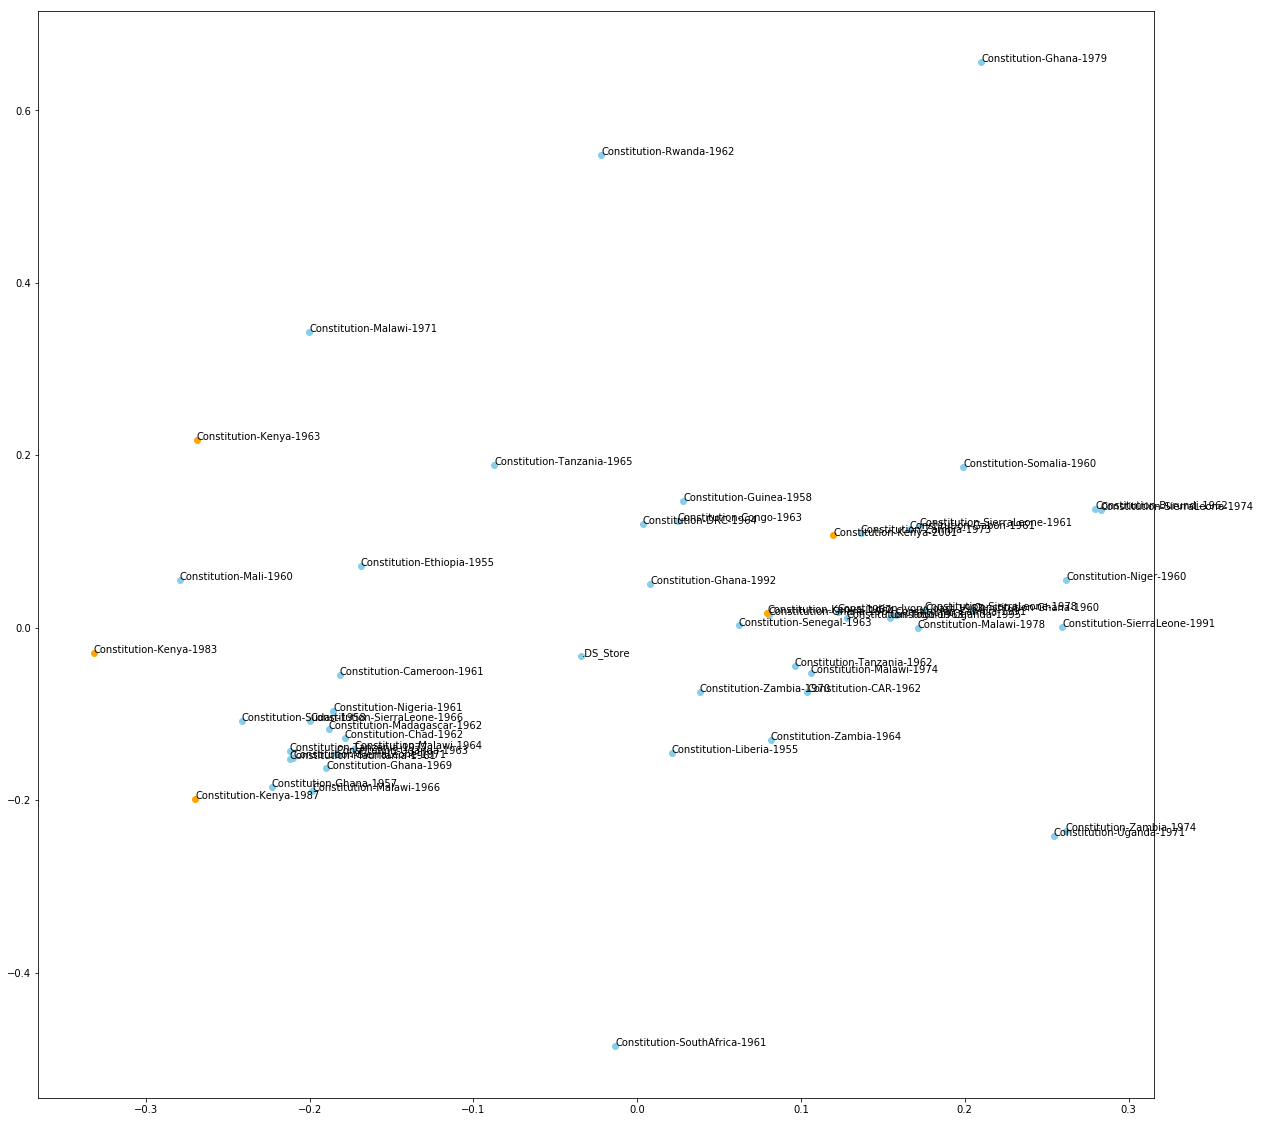

In [290]:
xs, ys = pos[:, 0], pos[:, 1]

# store shortened version of filenames to list for plotting 
names = [os.path.basename(fn).replace('.txt', '') for fn in filenames]

plt.figure(figsize=(20, 20))

for x, y, name in zip(xs, ys, names):
    color = 'orange' if "Kenya" in name else 'skyblue'
    plt.scatter(x, y, c=color, )
    plt.text(x, y, name)

plt.show()


### What does this plot actually show us? 

In the plotted figure above, we have created a visual representation of the pairwise distance between texts (where distance is represented by X and Y coordinates in a 2-dimensional plane). In looking at this figure, the values on the X and the Y axis are not substantively meaningful on their own, i.e. the 1961 South African Constitution having a coordinate value of (0.01, -0.45) doesn't tell us anything. Rather, what we care about here is the **distance between** the 1961 South African Constitution and any other constitution on the 2-D coordinate plane, e.g. the 1955 Constitution from Liberia or the 1964 Constitution from Zambia. This plot shows us that the South African Constitution is more similar to the 1955 Liberian Constitution than the 1964 Zambian Constitution.

So it is the **distance between coordinate values** -- rather than the coordinate values themselves -- which provide substantive meaning.

### Clustering texts based on distance

One way to explore the corpus is to cluster texts into discrete groups of similar texts.


One strategy for clustering is called Ward’s method that produces a hierarchy of clusterings. Ward’s method begins with a set of pairwise distance measurements–such as those we calculated a moment ago. The clustering method is as follows :

1. At the start, treat each data point as one cluster. The number of clusters at the start will be K, while K is an integer representing the number of data points.
2. Form a cluster by joining the two closest data points resulting in K-1 clusters.
3. Form more clusters by joining the two closest clusters resulting in K-2 clusters.
4. Repeat the above three steps until one big cluster is formed.
5. Once single cluster is formed, dendrograms (tree diagrams) are used to divide into multiple clusters depending upon the problem. 

The function scipy.cluster.hierarchy.ward performs this algorithm and returns a tree of cluster-merges. The hierarchy of clusters can be visualized using scipy.cluster.hierarchy.dendrogram.

In [291]:
from scipy.cluster.hierarchy import ward, dendrogram

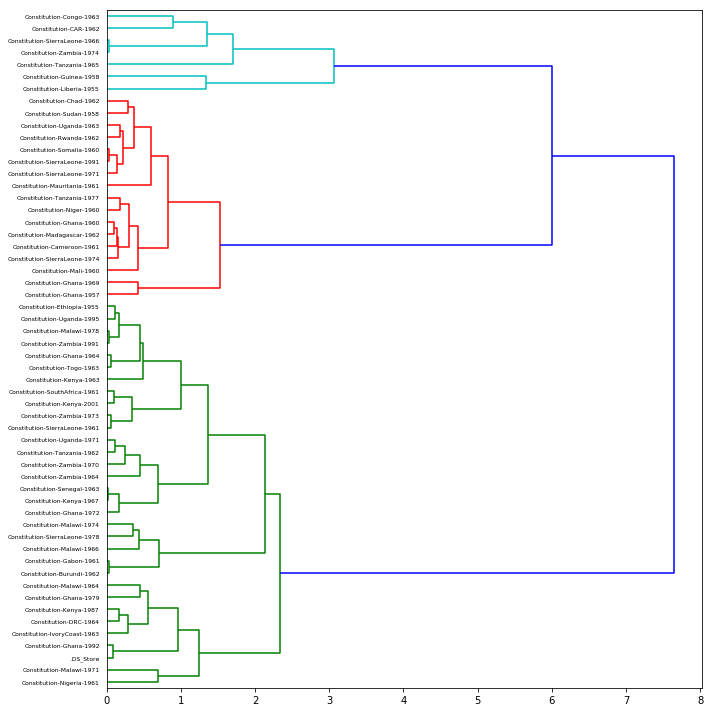

In [292]:
linkage_matrix = ward(dist)

dendrogram(linkage_matrix, orientation="right", labels=names)

plt.tight_layout()
plt.show()

# Exercises

1. Using the strings below as documents and using CountVectorizer with the input='content' parameter, create a document-term matrix. Apart from the input parameter, use the default settings.

In [328]:
text1 = "The Fake News is saying that I am willing to meet with Iran, “No Conditions.” That is an incorrect statement (as usual!)."
text2 = "Here we go again with General Motors and the United Auto Workers. Get together and make a deal!"
text3 = "Saudi Arabia oil supply was attacked. There is reason to believe that we know the culprit, are locked and loaded depending on verification, but are waiting to hear from the Kingdom as to who they believe was the cause of this attack, and under what terms we would proceed!"
text4 = "PLENTY OF OIL!"

In [326]:
vectorizer = CountVectorizer(input = 'content',
                            encoding= 'ISO-8859-1',
                             stop_words='english',
                             min_df = 1,
                             decode_error='ignore')

dtm = vectorizer.fit_transform([text1, text2, text3, text4])  # .abspaths() provides the absolute filepath to every document in our corpus

vocab = vectorizer.get_feature_names()  # a list

In [327]:
dtm.shape

(4, 38)

2. Using the document-term matrix just created, calculate the Euclidean distance and cosine distance between each pair of documents. Make sure to calculate distance (rather than similarity). Are our intuitions about which texts are most similar reflected in the measurements of distance?
